In [2]:
import numpy as np

# Load the specified columns (1-indexed: 2nd, 4th, and 6th) from the CSV file
data = np.genfromtxt('Kuperman-BRM-data-2012.csv', delimiter=',', skip_header=1, usecols=(1, 3, 5), dtype=float, encoding='utf-8', missing_values='NA', filling_values=np.nan)

print(data)

[[1.900e+01 1.580e+00 4.120e+02]
 [1.900e+01 1.890e+00 5.289e+03]
 [2.100e+01 2.000e+00 5.000e-01]
 ...
 [2.100e+01       nan 5.000e-01]
 [2.100e+01       nan 5.000e-01]
 [2.100e+01       nan 5.000e-01]]


In [9]:
# Process the data to extract meaningful information
# Each row contains: [number of participants, average age of acquisition, frequency count]
for row in data:
    participants = int(row[0])
    avg_age = row[1]
    frequency = int(row[2])
    with open('age of acusation-frequincy.txt', 'a') as f:
        f.write(f"Participants: {participants}, Average Age of Acquisition: {avg_age}, Frequency: {frequency}\n")

In [4]:
# Check the shape of the array
print("Shape of the array:", data.shape)

# Check the data type of the array
print("Data type of the array:", data.dtype)

# Calculate basic statistics
print("Minimum value in each column:", np.min(data, axis=0))
print("Maximum value in each column:", np.max(data, axis=0))
print("Mean value in each column:", np.mean(data, axis=0))
print("Standard deviation in each column:", np.std(data, axis=0))

Shape of the array: (30121, 3)
Data type of the array: float64
Minimum value in each column: [15.   nan  0.5]
Maximum value in each column: [  1939.     nan 314232.]
Mean value in each column: [ 22.97991435          nan 446.40934896]
Standard deviation in each column: [  86.4750125            nan 5353.79530775]


In [5]:
# Filter out rows with NaN values
filtered_data = data[~np.isnan(data).any(axis=1)]

print("Filtered data (rows without NaN values):")
print(filtered_data)

Filtered data (rows without NaN values):
[[1.900e+01 1.580e+00 4.120e+02]
 [1.900e+01 1.890e+00 5.289e+03]
 [2.100e+01 2.000e+00 5.000e-01]
 ...
 [1.900e+01 2.100e+01 2.000e+00]
 [1.900e+01 2.100e+01 1.000e+00]
 [2.100e+01 2.500e+01 5.000e-01]]


In [6]:
# Recalculate summary statistics for filtered data
min_values = np.min(filtered_data, axis=0)
max_values = np.max(filtered_data, axis=0)
mean_values = np.mean(filtered_data, axis=0)
std_dev_values = np.std(filtered_data, axis=0)

# Print the summary statistics
print("Summary Statistics for Filtered Data:")
print(f"Minimum values: {min_values}")
print(f"Maximum values: {max_values}")
print(f"Mean values: {mean_values}")
print(f"Standard deviation: {std_dev_values}")

# Check for potential surprises (e.g., unusually high/low values)
threshold = 2 * std_dev_values  # Example threshold for anomalies
anomalies = np.any((filtered_data < (mean_values - threshold)) | (filtered_data > (mean_values + threshold)), axis=0)

print("\nPotential anomalies detected in columns:")
for i, anomaly in enumerate(anomalies):
    if anomaly:
        print(f"Column {i + 1} has potential anomalies.")

Summary Statistics for Filtered Data:
Minimum values: [15.    1.58  0.5 ]
Maximum values: [1.93900e+03 2.50000e+01 3.14232e+05]
Mean values: [ 22.98119726  11.09834264 446.6903528 ]
Standard deviation: [8.65022839e+01 2.99985040e+00 5.35547298e+03]

Potential anomalies detected in columns:
Column 1 has potential anomalies.
Column 2 has potential anomalies.
Column 3 has potential anomalies.


In [7]:
# Normalize the last column of the array to turn raw frequencies into relative word frequencies
filtered_data[:, -1] /= np.sum(filtered_data[:, -1])

print("Normalized data (last column as relative frequencies):")
print(filtered_data)

Normalized data (last column as relative frequencies):
[[1.90000000e+01 1.58000000e+00 3.06404607e-05]
 [1.90000000e+01 1.89000000e+00 3.93343196e-04]
 [2.10000000e+01 2.00000000e+00 3.71850252e-08]
 ...
 [1.90000000e+01 2.10000000e+01 1.48740101e-07]
 [1.90000000e+01 2.10000000e+01 7.43700503e-08]
 [2.10000000e+01 2.50000000e+01 3.71850252e-08]]


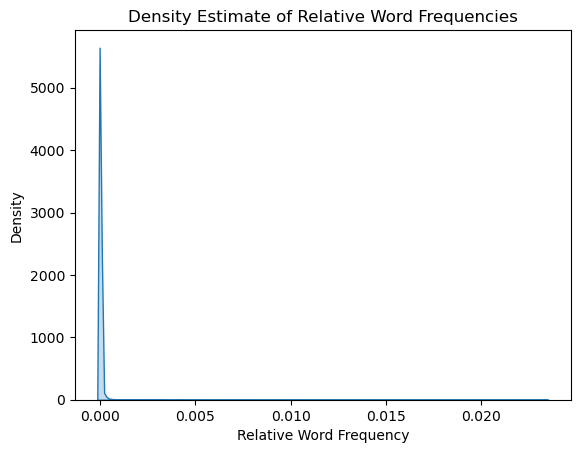

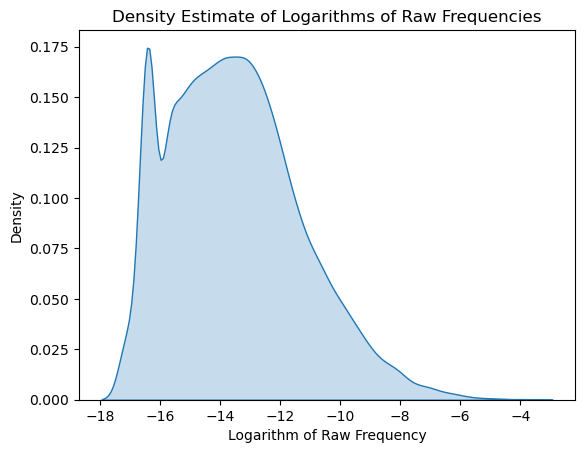

Notice if the logarithmic plot shows unusual clustering or gaps, which might indicate issues in the data.


In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot a smooth density estimate of the relative word frequencies
sns.kdeplot(filtered_data[:, -1], fill=True)
plt.title("Density Estimate of Relative Word Frequencies")
plt.xlabel("Relative Word Frequency")
plt.ylabel("Density")
plt.show()

# Plot the logarithms of the raw frequencies
log_frequencies = np.log(filtered_data[:, -1])
sns.kdeplot(log_frequencies, fill=True)
plt.title("Density Estimate of Logarithms of Raw Frequencies")
plt.xlabel("Logarithm of Raw Frequency")
plt.ylabel("Density")
plt.show()

# Observations
print("Notice if the logarithmic plot shows unusual clustering or gaps, which might indicate issues in the data.")